In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import importlib

In [2]:
df = pd.read_csv("../data/csv/df_final.csv").copy()
df.head()

,Location,Region,EU Member,Schengen Agreement,Google Domain Type,Google Domain Used,Job Title,Company Name,Job Location,Apply Options,...,native_interop,native_ui,networking,platform_android,platform_apple,runtimes,security_compliance,team_collaboration,testing_quality,version_control
0,Austria,Europe,True,True,default,google.com,"Android Developer – Kotlin (Austria based, Hyb...",Bitcoin Devs Company,"Vienna, Austria",Jobs3,...,NaN,NaN,Retrofit,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,Europe,True,True,default,google.com,ios entwickler 80–100% w/m/d,CHANCENLAND VORARLBERG,"Dornbirn, Austria","IT-Career.at, STEMJOBS.AT, IT-JOBS.AT",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austria,Europe,True,True,default,google.com,Middle iOS developer,Processica,"Vienna, Austria",JOBITT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,Europe,True,True,default,google.com,iOS Developer,Raiffeisen Gruppe,"Linz, Austria","Jooble, Trabajo.org - Stellenangebote, Arbeit",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Austria,Europe,True,True,default,google.com,iOS Software Engineer,Cybermoth,"Vienna, Austria","Expertini, Talent.com",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Leave only the necessary columns

In [3]:
def filtered_data(df):
    # Drop columns: 'Technologies Only', 'Technologies Categorized' and 8 other columns
    df = df.drop(columns=['Google Domain Type', 'Google Domain Used', 'Job Title', 'Company Name', 'Job Location',
                          'Apply Options', 'Job Description', 'Work from home', 'Salary', 'Schedule type', 'Qualifications',
                          'Search Date', 'Search Query', 'Language', 'Job Description English', 'Job Description Extracted', 
                          'Salary_E', 'Requirements', 'Nice to have', 'Responsibilities', 'Benefits', 'Full Requirements', 
                          'Extracted Technologies GPT', 'Extracted Technologies Clean','Technologies Only', 
                          'Technologies Categorized', 'Tech_dict'])
    return df

df = filtered_data(df)
df.head()

,Location,Region,EU Member,Schengen Agreement,Job ID,Platform,api_documentation,app_distribution,architecture,backend_baas,...,native_interop,native_ui,networking,platform_android,platform_apple,runtimes,security_compliance,team_collaboration,testing_quality,version_control
0,Austria,Europe,True,True,eyJqb2JfdGl0bGUiOiJBbmRyb2lkIERldmVsb3BlciDigJ...,Android,NaN,Google Play Store / Google Play Console,Model-View-ViewModel (MVVM),NaN,...,NaN,NaN,Retrofit,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,Europe,True,True,eyJqb2JfdGl0bGUiOiJpb3MgZW50d2lja2xlciA4MOKAkz...,iOS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austria,Europe,True,True,eyJqb2JfdGl0bGUiOiJNaWRkbGUgaU9TIGRldmVsb3Blci...,iOS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,Europe,True,True,eyJqb2JfdGl0bGUiOiJpT1MgRGV2ZWxvcGVyIiwiY29tcG...,iOS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Austria,Europe,True,True,eyJqb2JfdGl0bGUiOiJpT1MgU29mdHdhcmUgRW5naW5lZX...,iOS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#df.to_csv("../data/csv/df_final_filtered.csv", index=False)

## Select regioins

In [4]:
eu_region = df[df['Region'] == 'Europe'].reset_index()
eu_region.head()

,index,Location,Region,EU Member,Schengen Agreement,Job ID,Platform,api_documentation,app_distribution,architecture,...,native_interop,native_ui,networking,platform_android,platform_apple,runtimes,security_compliance,team_collaboration,testing_quality,version_control
0,0,Austria,Europe,True,True,eyJqb2JfdGl0bGUiOiJBbmRyb2lkIERldmVsb3BlciDigJ...,Android,NaN,Google Play Store / Google Play Console,Model-View-ViewModel (MVVM),...,NaN,NaN,Retrofit,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Austria,Europe,True,True,eyJqb2JfdGl0bGUiOiJpb3MgZW50d2lja2xlciA4MOKAkz...,iOS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Austria,Europe,True,True,eyJqb2JfdGl0bGUiOiJNaWRkbGUgaU9TIGRldmVsb3Blci...,iOS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Austria,Europe,True,True,eyJqb2JfdGl0bGUiOiJpT1MgRGV2ZWxvcGVyIiwiY29tcG...,iOS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Austria,Europe,True,True,eyJqb2JfdGl0bGUiOiJpT1MgU29mdHdhcmUgRW5naW5lZX...,iOS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
na_region = df[df['Region'] == 'Northern America'].reset_index()
na_region.head()

,index,Location,Region,EU Member,Schengen Agreement,Job ID,Platform,api_documentation,app_distribution,architecture,...,native_interop,native_ui,networking,platform_android,platform_apple,runtimes,security_compliance,team_collaboration,testing_quality,version_control
0,120,Canada,Northern America,False,False,eyJqb2JfdGl0bGUiOiJTZW5pb3IgaU9TIERldmVsb3Blci...,iOS,NaN,NaN,"Model-View-Controller (MVC), Model-View-Presen...",...,NaN,"SwiftUI, UIKit",GraphQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,121,Canada,Northern America,False,False,eyJqb2JfdGl0bGUiOiJUZWNobm9sb2d5IExlYWQgLSBJT1...,iOS,NaN,NaN,Model-View-ViewModel (MVVM),...,NaN,SwiftUI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,122,Canada,Northern America,False,False,eyJqb2JfdGl0bGUiOiJJT1MgRGV2ZWxvcGVyIiwiY29tcG...,iOS,NaN,NaN,Model-View-ViewModel (MVVM),...,NaN,NaN,"GraphQL, REST API",NaN,NaN,NaN,NaN,Jira,NaN,NaN
3,123,Canada,Northern America,False,False,eyJqb2JfdGl0bGUiOiJKdW5pb3IgaU9TIERldmVsb3Blci...,iOS,NaN,NaN,NaN,...,NaN,"UIKit, Core Animation",REST API,NaN,iOS SDK,NaN,"OAuth, Advanced Encryption Standard (AES), Riv...",NaN,XCTest,Git
4,124,Canada,Northern America,False,False,eyJqb2JfdGl0bGUiOiJpT1MgRGV2ZWxvcGVyIChSZW1vdG...,iOS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Select Platforms

In [14]:
eu_region[eu_region['Platform'] == "iOS"]['languages'].dropna().str.split(',').explode().str.strip().value_counts().reset_index()
#eu_region.columns = ['architectural_patterns', 'count']
# eu_region[eu_region['Platform'] == "iOS"]['languages'].dropna().str.split(',').explode().str.strip().value_counts().reset_index()

,languages,count
0,Swift,664
1,Objective-C,276
2,C++,24
3,JavaScript,18
4,Python,13
5,TypeScript,10
6,C,7
7,C#,6
8,SQL,5
9,PHP,5


## Re-creating data for BI instrument

In [25]:
# --- parameters you may tweak ---
id_cols    = ['Job ID', 'Location', 'Region', 'Platform']
stack_cols = [c for c in df.columns if c not in id_cols
                                   and c not in ['EU Member', 'Schengen Agreement']]
# ---------------------------------
long = (
    df.melt(id_vars=id_cols, value_vars=stack_cols,
            var_name='Category', value_name='Technology')
        .dropna(subset=['Technology'])
        .assign(Technology=lambda d: d['Technology'].str.split(','))
        .explode('Technology')
        .assign(Technology=lambda d: d['Technology'].str.strip())
        .query('Technology != ""')
        .sort_values(by='Location')
        .reset_index(drop=True)
)

long.head()
long.to_csv('../data/csv/df_final_filtered_long.csv', index=False)

## Data to Excel

In [ ]:
# ---------- ПАРАМЕТРЫ -------------
OUT         = 'C:\\Users\\ireev\\Desktop\\mobile_tech_summary.xlsx'  # куда сохранить Excel
REG_EU      = 'Europe'
REG_NA      = 'Northern America'
PLATFORMS   = ('iOS', 'Android')               # порядок секций внутри листа
# Переименуйте как хотите
ALIASES = dict(EU_count='EU count',
                EU_pct  ='EU %',
                NA_count='NA count',
                NA_pct  ='NA %')
# ----------------------------------


tech_cols = df.columns[df.columns.get_loc('architectural_patterns'):]

def count_pct(series: pd.Series) -> pd.DataFrame:
    total = len(series)
    vc    = (series.dropna()
                   .str.split(',')
                   .explode()
                   .str.strip()
                   .value_counts())
    pct   = (vc / total * 100).round(2)
    out   = pd.DataFrame({'count': vc.astype(int), 'pct': pct})
    return out.sort_values('count', ascending=False)      # ключевая строка!

def make_sheet(writer: pd.ExcelWriter, col: str):
    ws   = writer.book.add_worksheet(col[:31])
    row  = 0

    for plat in PLATFORMS:
        # ---------- независимые списки EU и NA -----------------------
        eu = count_pct(df[(df['Region'] == REG_EU) & (df['Platform'] == plat)][col])
        na = count_pct(df[(df['Region'] == REG_NA) & (df['Platform'] == plat)][col])

        # переименовываем колонки
        eu = (eu.reset_index()
                .rename(columns={'index': col,
                                 'count': ALIASES['EU_count'],
                                 'pct'  : ALIASES['EU_pct']}))

        na = (na.reset_index()
                .rename(columns={'index': f'{col} (NA)',
                                 'count': ALIASES['NA_count'],
                                 'pct'  : ALIASES['NA_pct']}))

        # ---------- «склеиваем по индексу» ---------------------------
        max_len = max(len(eu), len(na))
        eu = eu.reindex(range(max_len))
        na = na.reindex(range(max_len))
        merged = pd.concat([eu, na], axis=1)

        # ---------- запись в лист -----------------------------------
        ws.write(row, 0, plat)      # заголовок секции
        row += 1
        merged.to_excel(writer, sheet_name=ws.get_name(),
                        index=False, header=True, startrow=row)
        row += len(merged) + 2      # отступ перед следующей секцией

with pd.ExcelWriter(OUT, engine='xlsxwriter') as writer:
    for col in tech_cols:
        make_sheet(writer, col)

# Graphs

In [6]:
df_patterns_eu = df[(df['Platform'] == "iOS") & (df['Region'] == "Europe")]['architectural_patterns'].dropna().str.split(',').explode().str.strip().value_counts().reset_index()
df_patterns_eu.columns = ['architectural_patterns', 'count']
df_patterns_eu

,architectural_patterns,count
0,MVVM,165
1,MVC,70
2,VIPER,47
3,MVP,38
4,Clean Architecture,29
5,VIP,5
6,Redux,3
7,MVI,2


In [7]:
df_patterns_na = df[(df['Platform'] == "iOS") & (df['Region'] == "Northern America")]['architectural_patterns'].dropna().str.split(',').explode().str.strip().value_counts().reset_index()
df_patterns_na.columns = ['architectural_patterns', 'count']
df_patterns_na

,architectural_patterns,count
0,MVVM,64
1,MVC,43
2,VIPER,19
3,MVP,16
4,Clean Architecture,10
5,Redux,2
6,MVI,1


# Huinya

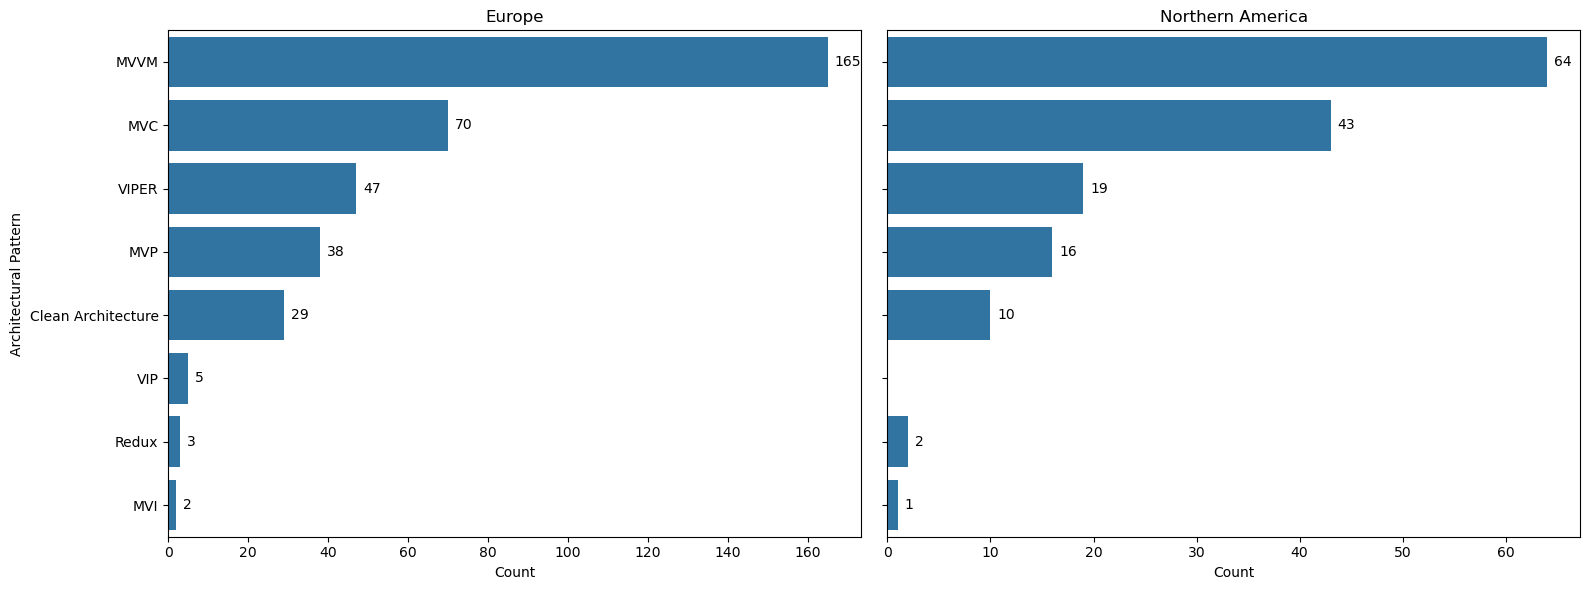

In [8]:
# создаём фигуру с 2 подграфиками (subplots)
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # sharey=True чтобы ось Y была общей

# Левый график - Европа
sns.barplot(
    data=df_patterns_eu,
    x='count',
    y='architectural_patterns',
    ax=axes[0],
    orient='h'
)
axes[0].set_title('Europe')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Architectural Pattern')

# подписываем бары
for container in axes[0].containers:
    axes[0].bar_label(container, padding=5)

# Правый график - Северная Америка
sns.barplot(
    data=df_patterns_na,
    x='count',
    y='architectural_patterns',
    ax=axes[1],
    orient='h'
)
axes[1].set_title('Northern America')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('')  # убираем дублирование подписи оси Y

# подписываем бары
for container in axes[1].containers:
    axes[1].bar_label(container, padding=5)

plt.tight_layout()
plt.show()

## Example

In [9]:
df_patterns = df[df['Platform'] == "iOS"]['architectural_patterns'].dropna().str.split(',').explode().str.strip().value_counts().reset_index()
df_patterns.columns = ['architectural_patterns', 'count']

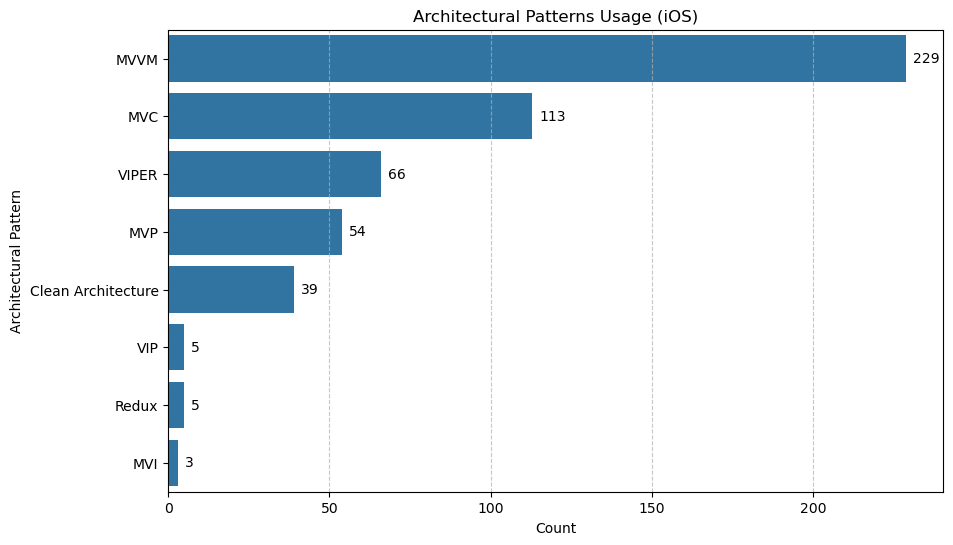

In [10]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_patterns,
    x='count',
    y='architectural_patterns',
    orient='h'
)

for i in ax.containers:
    ax.bar_label(i, padding=5)

plt.title('Architectural Patterns Usage (iOS)')
plt.xlabel('Count')
plt.ylabel('Architectural Pattern')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [11]:
df[df['Platform'] == "Android"]['architectural_patterns'].dropna().str.split(',').explode().str.strip().value_counts().reset_index()

,architectural_patterns,count
0,MVVM,233
1,MVP,97
2,Clean Architecture,78
3,MVC,45
4,MVI,41
5,VIPER,7
6,Redux,3


---

## Domain Analysis

In [ ]:
def analyze_domain_effectiveness(df):
    """Анализирует эффективность домена google.com vs local для каждой страны."""
    domain_counts = df.groupby(["Location", "Google Domain Type"]).size().unstack(fill_value=0)
    
    # Переименовываем столбцы
    domain_counts = domain_counts.rename(columns={"default": "Google.com Jobs", "local": "Local Domain Jobs"})
    
    # Добавляем метрики
    domain_counts["Total Jobs"] = domain_counts.sum(axis=1)
    domain_counts["Google.com Share"] = domain_counts["Google.com Jobs"] / domain_counts["Total Jobs"]
    domain_counts["Local Domain Share"] = domain_counts["Local Domain Jobs"] / domain_counts["Total Jobs"]
    domain_counts["Google vs Local Diff"] = domain_counts["Google.com Share"] - domain_counts["Local Domain Share"]
    
    # Подсчёт уникальных вакансий для каждого домена
    unique_jobs = df.groupby("Job ID")["Google Domain Type"].nunique().reset_index()
    unique_jobs = unique_jobs[unique_jobs["Google Domain Type"] == 1]
    unique_counts = df[df["Job ID"].isin(unique_jobs["Job ID"])].groupby(["Location", "Google Domain Type"]).size().unstack(fill_value=0)
    unique_counts = unique_counts.rename(columns={"default": "Unique Google.com Jobs", "local": "Unique Local Domain Jobs"})
    
    # Объединяем с основными данными
    domain_counts = domain_counts.join(unique_counts, how="left").fillna(0)
    
    print("Анализ эффективности доменов:")
    print(domain_counts.sort_values(by="Google.com Share", ascending=False).head(10))
    
    return domain_counts

domain_table = analyze_domain_effectiveness(df)
domain_table.head()

Анализ эффективности доменов:
Google Domain Type  Google.com Jobs  Local Domain Jobs  Total Jobs  \
Location                                                             
Austria                          63                  0          63   
Hungary                          33                  0          33   
Slovenia                          7                  0           7   
Slovakia                         10                  0          10   
Norway                           12                  0          12   
Netherlands                      81                  0          81   
Malta                             4                  0           4   
Luxembourg                        8                  0           8   
Lithuania                        23                  0          23   
Liechtenstein                     1                  0           1   

Google Domain Type  Google.com Share  Local Domain Share  \
Location                                                   
Austria  

Google Domain Type,Google.com Jobs,Local Domain Jobs,Total Jobs,Google.com Share,Local Domain Share,Google vs Local Diff,Unique Google.com Jobs,Unique Local Domain Jobs
Location,,,,,,,,
Austria,63,0,63,1.000000,0.000000,1.000000,63,0
Belgium,30,0,30,1.000000,0.000000,1.000000,30,0
Bulgaria,26,1,27,0.962963,0.037037,0.925926,26,1
Canada,176,13,189,0.931217,0.068783,0.862434,176,13
Croatia,16,0,16,1.000000,0.000000,1.000000,16,0
